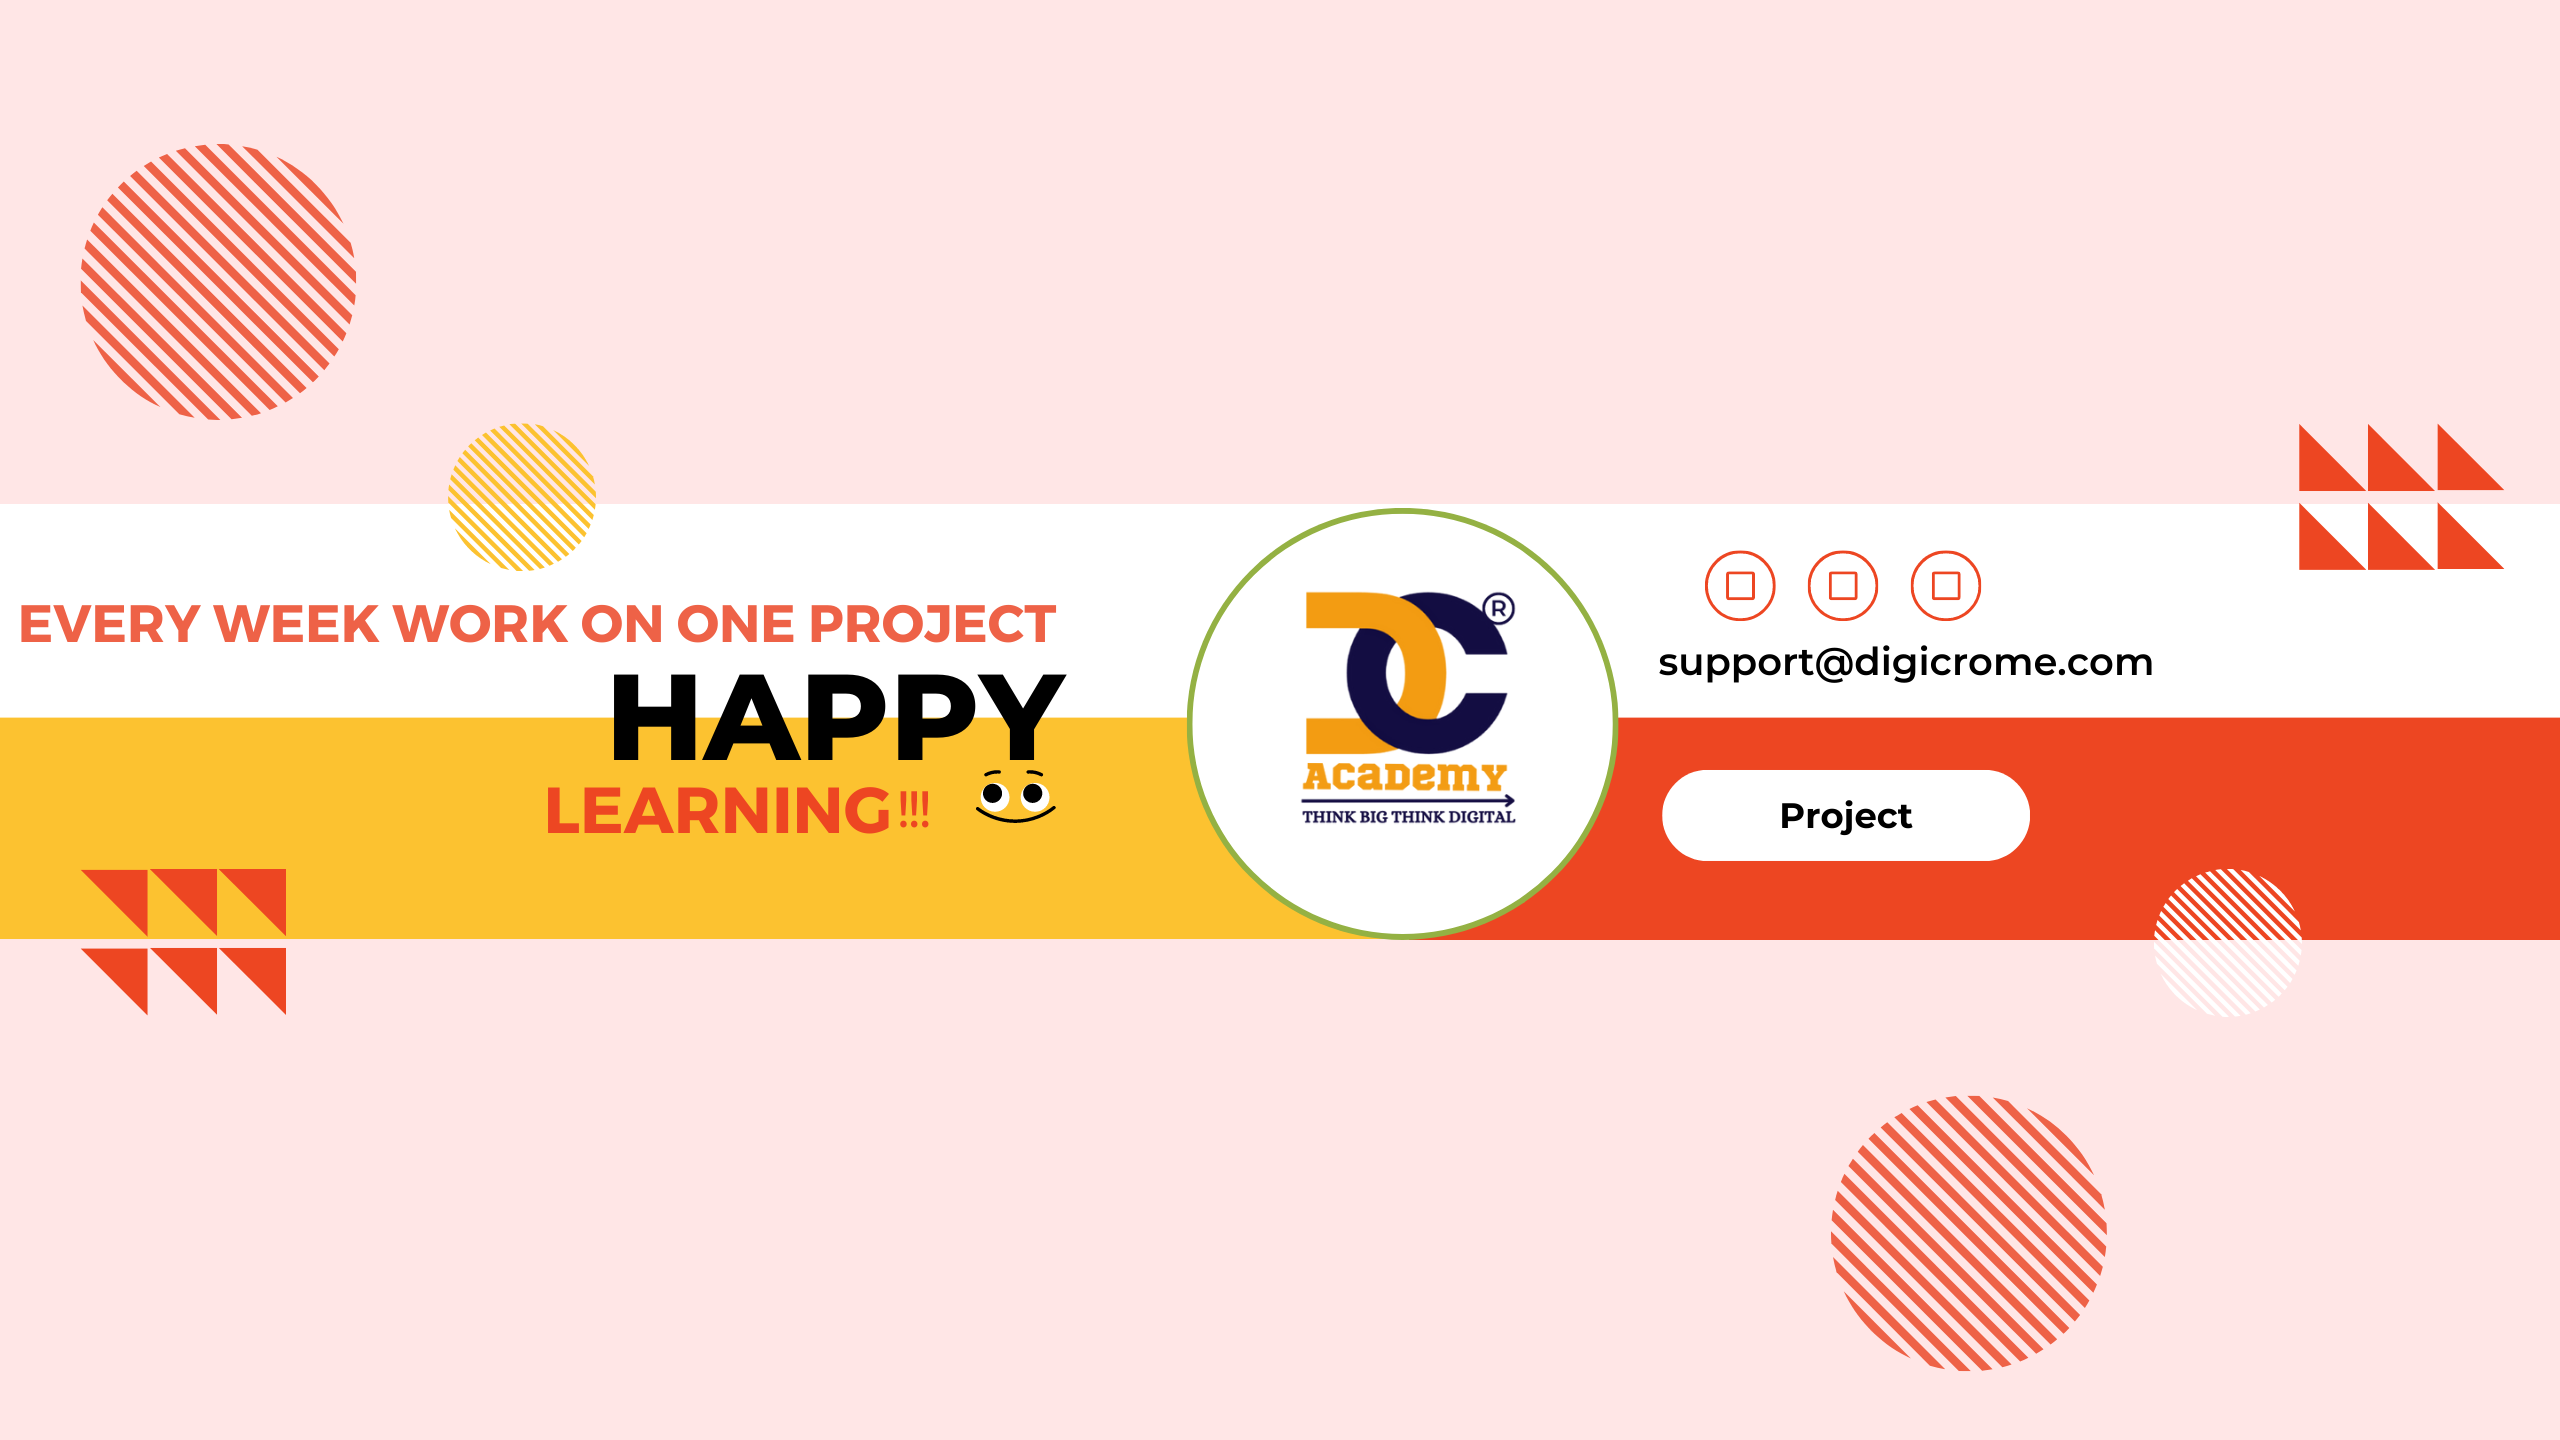

In [ ]:
from IPython import display
display.Image("jupyter banner.png")

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
data=sns.load_dataset( 'titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



|Variable|	Definition|	Key|
|---|---|---|
 |survival|	Survival	|0 = No, 1 = Yes|
 |pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
 |sex|	Sex	|
 |Age|	Age in years|	
 |sibsp|	# of siblings / spouses aboard the Titanic|	
 |parch|	# of parents / children aboard the Titanic|	
 |ticket|	Ticket number	|
 |fare|	Passenger fare|	
 |cabin|	Cabin number	|
 |embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|


### Variable Notes
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- 
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- 
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- 
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

### Target Value is Y= Survived Column
* Try to find what is the main reason people surviving and do not survivng on the ship
* Does their gender, class, age, and other factors play any role here
* Best case scenario to survive and worst case scenario for not surviving
#### Once you learn Machine Learning Classification please also build a model that predict who is surviving and not surviving
#### Once you learn Deep Learning ANN please also build a model that predict who is surviving and not surviving ANN Model

##### $Start$

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
Data = sns.load_dataset('titanic')

## Find head

In [6]:
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Find tail

In [7]:
Data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Find the info

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Find the Description

In [9]:
Data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Find the correlation

In [10]:
Data.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## Find null values

In [11]:
Data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
Data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
Data.isnull().sum()[Data.isnull().sum()>0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [15]:
Data.shape   ## 891 rows and 15 columns

(891, 15)

## Heatmap

<AxesSubplot:>

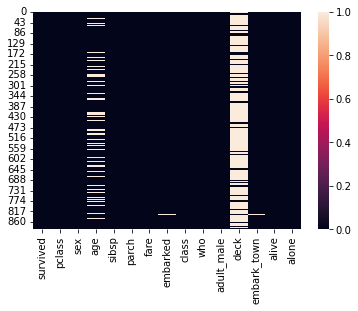

In [16]:
sns.heatmap(Data.isnull())

In [6]:
Data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Fill the Null Values

In [9]:
Data.isnull().sum()[Data.isnull().sum()>0]/Data.shape[0]*100

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [10]:
Data.age.fillna(Data.age.mean(),inplace=True) # fill null value of age column by mean
Data.embarked.fillna(Data.embarked.mode()[0],inplace=True) # fill null value of embarked by mode
Data.embark_town.fillna(Data.embark_town.mode()[0],inplace=True) # fill the null value of embark_town by mode

In [11]:
Data.drop(columns="deck",inplace=True)

In [13]:
Data.isnull().sum()[Data.isnull().sum()>0]

Series([], dtype: int64)

## EDA (PLOTS)

In [14]:
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


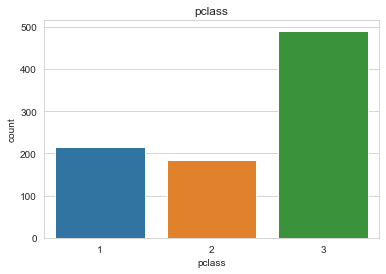

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.countplot(x="pclass",data=Data).set(title='pclass') # Count of Passengers in 1st,2nd and 3rd class
plt.show()

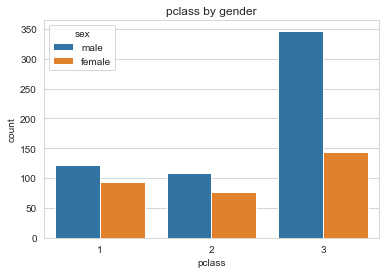

In [20]:
sns.countplot(x='pclass',data=Data,hue='sex').set(title='pclass by gender')  # taking out the passenger numbers by gender
plt.show()

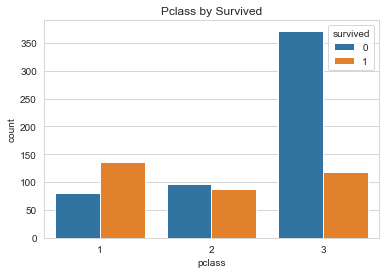

In [21]:
sns.countplot(x='pclass',data=Data,hue='survived').set(title='Pclass by Survived') # taking out the number of survived passengers class wise
plt.show()

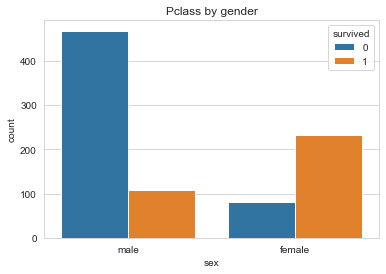

In [22]:
sns.countplot(x='sex',data=Data,hue='survived').set(title='Pclass by gender') # taking out number of survived as per the gender
plt.show()

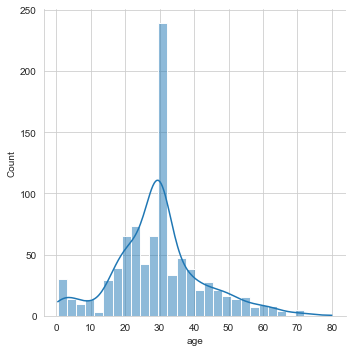

In [24]:
sns.displot(x='age',data=Data,kde=True) # Find out the age of the people travelling in the Titanic sheep with the help of distribution plot
plt.show()

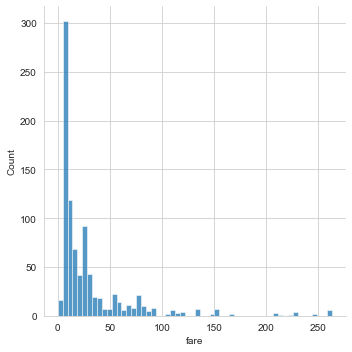

In [25]:
sns.displot(x='fare',data=Data[Data.fare<300]) # find the count of people whose fare is less than 300
plt.show()

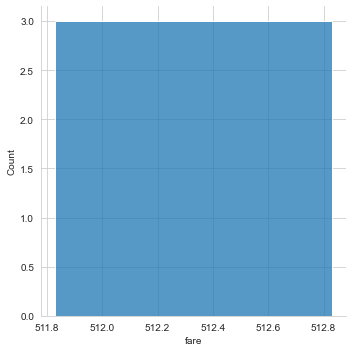

In [26]:
sns.displot(x='fare',data=Data[Data.fare>300]) # find the count of people whose fare is greater" than 300
plt.show()

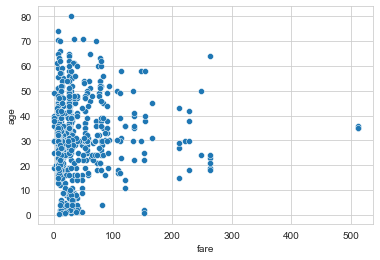

In [27]:
sns.scatterplot(x='fare',y='age',data=Data) # scatter plot with respect to fare and age
plt.show()

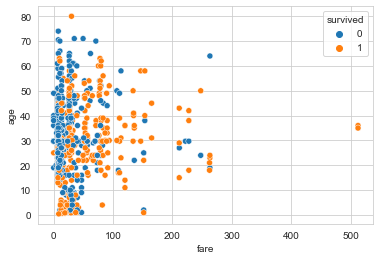

In [28]:
sns.scatterplot(x='fare',y='age',data=Data,hue='survived') # number of survived with respect to fare and age
plt.show()

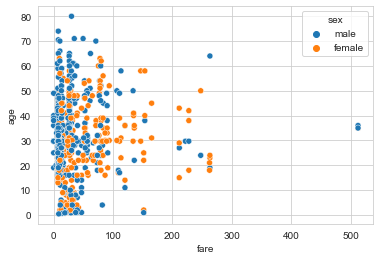

In [29]:
sns.scatterplot(x='fare',y='age',data=Data,hue='sex')   # number of males and females with respect to fare and age
plt.show()

## Encoding

In [30]:
Data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

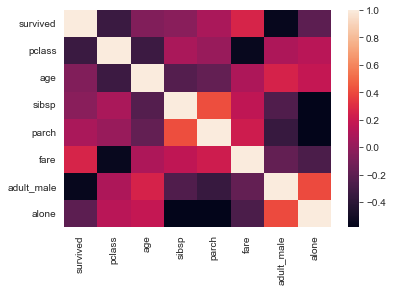

In [31]:
sns.heatmap(Data.corr())  # finding out the correlation

<AxesSubplot:>

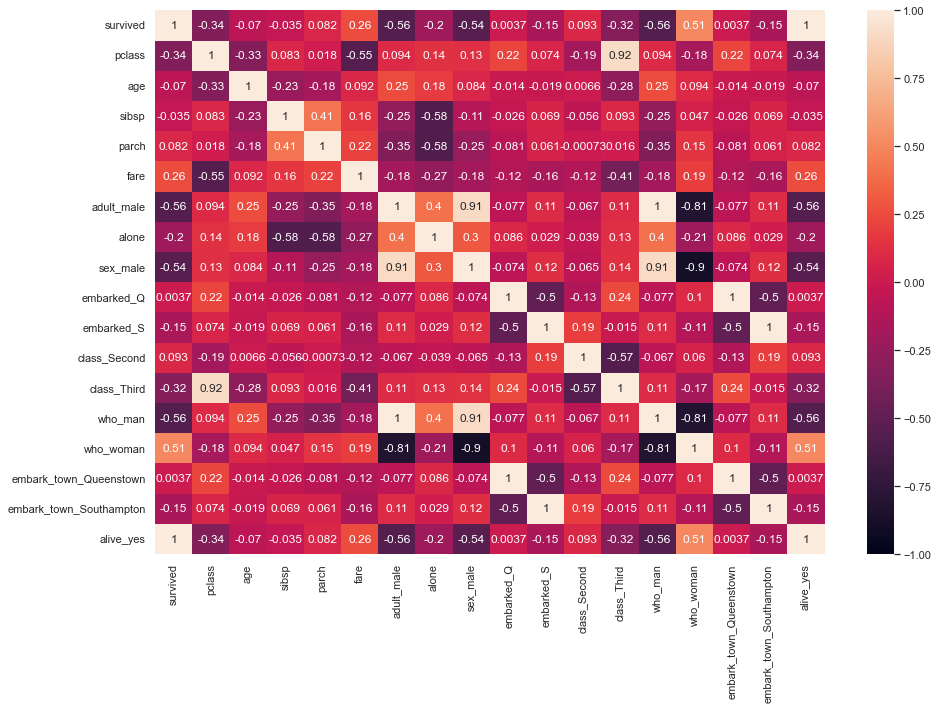

In [32]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(pd.get_dummies(Data,drop_first=True).corr(),annot=True,vmin=-1)  # get dummies

In [33]:
Data.alive.unique()

array(['no', 'yes'], dtype=object)

In [34]:
copy_col=["alive","embark_town","alone","adult_male","class","who"]

In [35]:
Data.drop(columns=copy_col,inplace=True)  # drop the data which is of no use

In [36]:
Data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


<AxesSubplot:>

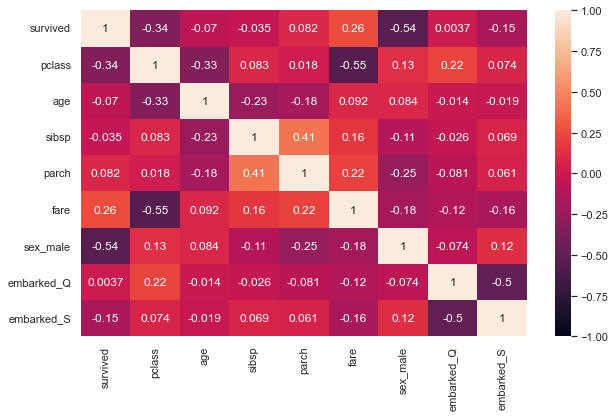

In [37]:
sns.set(rc={"figure.figsize":(10,6)})
sns.heatmap(pd.get_dummies(Data,drop_first=True).corr(),annot=True,vmin=-1)  

<AxesSubplot:>

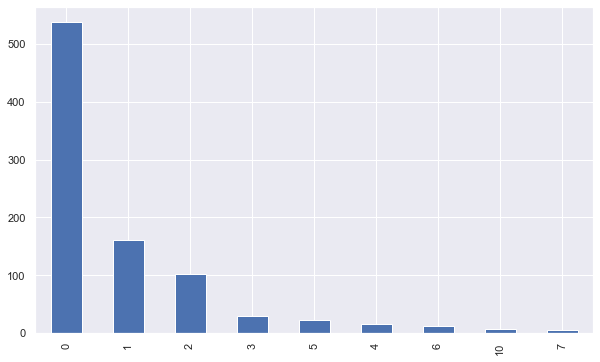

In [38]:
(Data.sibsp+Data.parch).value_counts().plot(kind='bar')

In [39]:
Data["family"]=Data.sibsp+Data.parch

In [40]:
Data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1


In [41]:
Data.drop(columns=["sibsp","parch"],inplace=True)

In [42]:
Data.head(2)

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1


In [43]:
Data=pd.get_dummies(Data,drop_first=True)

In [44]:
Data.head(2)

,survived,pclass,age,fare,family,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0


### Machine Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
